This notebook selects the configurations of interest from a classical molecular dynamics simulation (CLMD)  to generate a distribution of collective variables that follows a specified distribution. The system is composed of a single butane molecule in a cubic box with 4 nm. 

In [99]:
# Import modules

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import plumed
import lammps_logfile as lmplog
#import warnings

First step is to load the data from the CLMD unbaised simulation and creae a list of dataframes. THen, we can plot the full list of dihedrals to observe the unbiased or Boltzmann Distribution with the full dataset.

In [100]:
## Create empty list 
diheds = []

## Define path of training data 
colvar_file ='../prep_train_data/./dihedral.dat'

## Append trainig data df to the list 
diheds.append(plumed.read_as_pandas(colvar_file))


# ### OPTIONAL: P;otting the full set of dihedral. Uncomment for plotting

# plt.hist(np.rad2deg(diheds[0].phi1), bins=50,density=False)  # You can adjust the number of bins as desired
# # Adding labels and title to the plot
# plt.title('Dihedral distribution (100K frames\n',fontsize=16, fontweight='bold')
# plt.xlabel('$\phi$ (degrees)',fontsize=16, fontweight='bold')
# plt.ylabel('Frequency',fontsize=16, fontweight='bold')
# # Increase size of tick labels
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)
# plt.xticks(np.arange(-180, 180+60, step=60))
# # Darken the borders of the plot
# ax = plt.gca()
# ax.spines['top'].set_linewidth(2)
# ax.spines['right'].set_linewidth(2)
# ax.spines['bottom'].set_linewidth(2)
# ax.spines['left'].set_linewidth(2)
# plt.show()

/tmp/ipykernel_18947/200165889.py:8: UserWarning: cannot load PLUMED instance, conversions will not be available
  diheds.append(plumed.read_as_pandas(colvar_file))


With the full dihedral list loaded, you can now use any of the functions bellow to select the samples the wil generated the dataset with the distribution of interest. The names of the functions are presented below and the code to each either of them is presented as comments. Uncomment the function to make use of them and generate the dataset of interest. 

In [101]:
## Function to generate Boltzmann Distribution dataset
def BoltmannDist(diheds_list=diheds,num_samples=500, verbose=True):

    ## Define random seed and select n samples following the original distribution
    np.random.seed(137)
    samp_diheds = np.random.choice(diheds_list[0].phi1.values,size=num_samples, replace=False)

    ## Use pandas to extract the determined indexes 
    df = diheds_list[0].copy()
    samp_dihed_index = df[df['phi1'].isin(samp_diheds)].index.tolist()
    samp_dihed_index = samp_dihed_index[:num_samples]
    diheds_from_index = df.phi1.values[samp_dihed_index]
    time_from_index = df.time.values[samp_dihed_index]
    len(diheds_from_index )

    if verbose:
        print(f'{len(samp_diheds)} samples were selected to generate a Boltmann Distribution of the CVs.')

    dist_name = 'BoltzmannDist_500Frames_CLC'
    plotting_bins = 50

    return diheds_from_index,samp_dihed_index,time_from_index,dist_name

##Use the function
selected_diheds, selected_indices,time_from_index,dist_name,plotting_bins = BoltmannDist(diheds_list=diheds,num_samples=500,verbose=True)


In [102]:
# ## Function to generate Uniform Distribution dataset
# def UniformDist(diheds_file = colvar_file,bin_num=50,n=10, verbose=True):

#     #Load colvarfile as a numpy array
#     colvar_file =np.loadtxt(diheds_file)

#     # Define number of bins and CV space
#     #bin_num = 50
#     cv_space = cv_space = np.linspace(-np.pi, np.pi, bin_num+1)

#     # Define number of samples to add in each bin
#     #n = 10
#     num_samples = bin_num * n

#     # Define seed
#     np.random.seed(165189)

#     # Create an empty dictionary and two empyt list. Dictionary stores the lists, and list store index and CV value of selected samples
#     selected_dict = {}
#     selected_indices_list = []
#     selected_values_list = []


#     # Iterate over the range of len(cv_space)
#     for i in range(len(cv_space)-1):
#         # Generate valid indices within the range of 'colvar_file' for the current cv_space interval
#         valid_indices = np.where(
#             (colvar_file[:, 1] >= cv_space[i]) & (colvar_file[:, 1] <= cv_space[i+1])
#         )[0]
        
#     #print(valid_indices)
        
#         # Select 'n' random indices from the valid indices
#         selected_indices = np.random.choice(valid_indices, size=n, replace=False)
#     #print(selected_indices)
#     #     #     # Store the valid indices in a list
#         selected_indices_list.append(selected_indices)

#     #     # Retrieve the corresponding values from 'colvar_file'
#         selected_values = colvar_file[selected_indices]

#         #Store 
#         selected_values_list.append(selected_values[:,0])

#         # Create a key for the current cv_space interval
#         key = f"{cv_space[i]}"

#         # Add the selected values to the dictionary under the key
#         selected_dict[key] = {'Index': selected_indices,
#                             'Time (fs)': selected_values[:, 0],
#                             'dihedrals': selected_values[:, 1]}

#     # Initialize an empty list to store dihedral values
#     samp_diheds = []

#     # Iterate through all keys in the dictionary and append 'dihedrals' values to the list
#     for key in selected_dict:
#         #print(selected_dict[key]['dihedrals'])
#         samp_diheds.extend(selected_dict[key]['dihedrals'])

#     ## Use pandas to extract the determined indexes 
#     df = diheds[0].copy()
#     samp_dihed_index = df[df['phi1'].isin(samp_diheds)].index.tolist()
#     samp_dihed_index = samp_dihed_index[:num_samples]
#     diheds_from_index = df.phi1.values[samp_dihed_index]
#     time_from_index = df.time.values[samp_dihed_index]
#     len(diheds_from_index )

#     if verbose:
#         print(f'{len(samp_diheds)} samples were selected to generate a Uniform Distribution of the CVs.')

#     dist_name = 'UniformDist_500Frames_CLC'
#     plotting_bins = 25
        
#     return diheds_from_index,samp_dihed_index,time_from_index,dist_name,plotting_bins

# ##Use the function

# # Define number of bins and CV space and number of samples to add in each bin (n).
# bin_num = 50
# n = 10
# selected_diheds, selected_indices,time_from_index,dist_name,plotting_bins = UniformDist(diheds_file = colvar_file,bin_num=50,n=10, verbose=True)


In [103]:
# ## Function to generate Half Left Uniform Distribution dataset
# def HalfUni_LeftDist(diheds_file = colvar_file,bin_num=50,n=20, verbose=True):

#     bin_num = 50
#     n = 20
#     #Load colvarfile as a numpy array
#     colvar_file =np.loadtxt(diheds_file)

#     # Define number of bins and CV space
#     #bin_num = 50
#     cv_space = cv_space = np.linspace(-np.pi, np.pi, bin_num+1)

#     # Define number of samples to add in each bin
#     #n = 10

#     # Define seed
#     np.random.seed(165189)

#     # Create an empty dictionary and two empyt list. Dictionary stores the lists, and list store index and CV value of selected samples
#     selected_dict = {}
#     selected_indices_list = []
#     selected_values_list = []


#     # Iterate over the range of len(cv_space)
#     for i in range(len(cv_space)-1):
#         # Generate valid indices within the range of 'colvar_file' for the current cv_space interval
#         valid_indices = np.where(
#             (colvar_file[:, 1] >= cv_space[i]) & (colvar_file[:, 1] <= cv_space[i+1])
#         )[0]
        
#     #print(valid_indices)
        
#         # Select 'n' random indices from the valid indices
#         selected_indices = np.random.choice(valid_indices, size=n, replace=False)
#     #print(selected_indices)
#     #     #     # Store the valid indices in a list
#         selected_indices_list.append(selected_indices)

#     #     # Retrieve the corresponding values from 'colvar_file'
#         selected_values = colvar_file[selected_indices]

#         #Store 
#         selected_values_list.append(selected_values[:,0])

#         # Create a key for the current cv_space interval
#         key = f"{cv_space[i]}"

#         # Add the selected values to the dictionary under the key
#         selected_dict[key] = {'Index': selected_indices,
#                             'Time (fs)': selected_values[:, 0],
#                             'dihedrals': selected_values[:, 1]}

#     # Create a new dictionary to store only the values of dihedrals bbetween -pi and 0 
#     selected_dict_2 = {}
#     for key, value in selected_dict.items():
#         if float(key) >= -np.pi and float(key) <= 0:
#             selected_dict_2[key] = value


#     # Initialize an empty list to store dihedral values
#     samp_diheds = []

#     # Iterate through all keys in the dictionary and append 'dihedrals' values to the list
#     for key in selected_dict_2:
#         #print(selected_dict[key]['dihedrals'])
#         samp_diheds.extend(selected_dict_2[key]['dihedrals'])

#     num_samples = 500
#     ## Use pandas to extract the determined indexes 
#     df = diheds[0].copy()
#     samp_dihed_index = df[df['phi1'].isin(samp_diheds)].index.tolist()
#     samp_dihed_index = samp_dihed_index[:num_samples]
#     diheds_from_index = df.phi1.values[samp_dihed_index]
#     time_from_index = df.time.values[samp_dihed_index]
#     len(diheds_from_index )

#     if verbose:
#         print(f'{len(samp_diheds)} samples were selected to generate the Half Left Uniform Distribution of the CVs.')

#     dist_name = 'HalfLeft_UniformDist_500Frames_CLC'
#     plotting_bins = 25
        
#     return diheds_from_index,samp_dihed_index,time_from_index,dist_name,plotting_bins
# ##Use the function

# # Define number of bins and CV space and number of samples to add in each bin (n).
# bin_num = 50
# n = 20
# selected_diheds, selected_indices,time_from_index,dist_name,plotting_bins = HalfUni_LeftDist(diheds_file = colvar_file,bin_num=50,n=10, verbose=True)


In [104]:
# ## Function to generate Half Right Uniform Distribution dataset
# def HalfUni_RightDist(diheds_file = colvar_file,bin_num=50,n=20, verbose=True):

#     bin_num = 50
#     n = 20
#     #Load colvarfile as a numpy array
#     colvar_file =np.loadtxt(diheds_file)

#     # Define number of bins and CV space
#     #bin_num = 50
#     cv_space = cv_space = np.linspace(-np.pi, np.pi, bin_num+1)

#     # Define number of samples to add in each bin
#     #n = 10

#     # Define seed
#     np.random.seed(165189)

#     # Create an empty dictionary and two empyt list. Dictionary stores the lists, and list store index and CV value of selected samples
#     selected_dict = {}
#     selected_indices_list = []
#     selected_values_list = []


#     # Iterate over the range of len(cv_space)
#     for i in range(len(cv_space)-1):
#         # Generate valid indices within the range of 'colvar_file' for the current cv_space interval
#         valid_indices = np.where(
#             (colvar_file[:, 1] >= cv_space[i]) & (colvar_file[:, 1] <= cv_space[i+1])
#         )[0]
        
#     #print(valid_indices)
        
#         # Select 'n' random indices from the valid indices
#         selected_indices = np.random.choice(valid_indices, size=n, replace=False)
#     #print(selected_indices)
#     #     #     # Store the valid indices in a list
#         selected_indices_list.append(selected_indices)

#     #     # Retrieve the corresponding values from 'colvar_file'
#         selected_values = colvar_file[selected_indices]

#         #Store 
#         selected_values_list.append(selected_values[:,0])

#         # Create a key for the current cv_space interval
#         key = f"{cv_space[i]}"

#         # Add the selected values to the dictionary under the key
#         selected_dict[key] = {'Index': selected_indices,
#                             'Time (fs)': selected_values[:, 0],
#                             'dihedrals': selected_values[:, 1]}

#     # Create a new dictionary to store only the values of dihedrals bbetween -pi and 0 
#     selected_dict_2 = {}
#     for key, value in selected_dict.items():
#         if float(key) >= 0 and float(key) <= np.pi:
#             selected_dict_2[key] = value


#     # Initialize an empty list to store dihedral values
#     samp_diheds = []

#     # Iterate through all keys in the dictionary and append 'dihedrals' values to the list
#     for key in selected_dict_2:
#         #print(selected_dict[key]['dihedrals'])
#         samp_diheds.extend(selected_dict_2[key]['dihedrals'])

#     num_samples = 500
#     ## Use pandas to extract the determined indexes 
#     df = diheds[0].copy()
#     samp_dihed_index = df[df['phi1'].isin(samp_diheds)].index.tolist()
#     samp_dihed_index = samp_dihed_index[:num_samples]
#     diheds_from_index = df.phi1.values[samp_dihed_index]
#     time_from_index = df.time.values[samp_dihed_index]
#     len(diheds_from_index )

#     if verbose:
#         print(f'{len(samp_diheds)} samples were selected to generate the Half Right Uniform Distribution of the CVs.')

#     dist_name = 'HalfRight_UniformDist_500Frames_CLC'
#     plotting_bins = 25

#     return diheds_from_index,samp_dihed_index,time_from_index,dist_name,plotting_bins

# ##Use the function

# # Define number of bins and CV space and number of samples to add in each bin (n).
# bin_num = 50
# n = 20
# selected_diheds, selected_indices,time_from_index,dist_name,plotting_bins  = HalfUni_RightDist(diheds_file = colvar_file,bin_num=50,n=10, verbose=True)


In [105]:
# ## Function to generate Bias Left Distribution dataset
# def BiasLeftDist(diheds_file = colvar_file,bin_num=50,initial_samples=50,total_samples=500, verbose=True):
#     #n =5
#     #initial_samples = 50  # Number of samples in the first bin
#     reduction_step = 1    # Reduction step for subsequent bins
#     #um_bins = 50 
#     #total_samples = 500

#     #Load colvarfile as a numpy array
#     colvar_file =np.loadtxt(diheds_file)

#     # Create an array with linspace from -pi to pi with 30 points. to create the cv space
#     cv_space = np.linspace(-np.pi, np.pi, bin_num + 1)

#     # Define random seed
#     np.random.seed(873465)

#     # Create an empty dictionary to store the selected values
#     selected_dict = {}
#     selected_indices_list = []
#     selected_values_list = []


#     # Iterate over the range of len(cv_space)
#     for i in range(len(cv_space)-1):
#         # Generate valid indices within the range of 'colvar_file' for the current cv_space interval
#         valid_indices = np.where(
#             (colvar_file[:, 1] >= cv_space[i]) & (colvar_file[:, 1] <= cv_space[i+1])
#         )[0]
        
#     #print(valid_indices)
#         # Calculate the number of samples to select for the current bin
#         current_samples = initial_samples - reduction_step * i
#         current_samples = max(0, current_samples)  # Ensure non-negative value
        
#         # Select 'n' random indices from the valid indices
#         selected_indices = np.random.choice(valid_indices, size=current_samples, replace=False)
#     #print(selected_indices)
#     #     #     # Store the valid indices in a list
#         selected_indices_list.append(selected_indices)

#     #     # Retrieve the corresponding values from 'colvar_file'
#         selected_values = colvar_file[selected_indices]
#     # print(selected_indices)
#     # print(selected_values)
#         #Store 
#         selected_values_list.append(selected_values[:,0])

#         # Create a key for the current cv_space interval
#         key = f"{cv_space[i]}"

#         # Add the selected values to the dictionary under the key
#         selected_dict[key] = {'Index': selected_indices,
#                             'Time (fs)': selected_values[:, 0],
#                             'dihedrals': selected_values[:, 1]}

#     # # Print the selected dictionary
#     # print(selected_dict)
        
#     # Initialize an empty list to store dihedral values
#     dihedrals_list = []

#     # Iterate through all keys in the dictionary and append 'dihedrals' values to the list
#     for key in selected_dict:
#         #print(selected_dict[key]['dihedrals'])
#         dihedrals_list.extend(selected_dict[key]['dihedrals'])


#     # Get the indexes pf the sampled diheds 
#     df = diheds[0].copy()
#     samp_dihed_index = df[df['phi1'].isin(dihedrals_list)].index.tolist()
#     samp_dihed_index = samp_dihed_index[:total_samples]
#     diheds_from_index = df.phi1.values[samp_dihed_index]
#     #time_from_index = df.time.values[samp_dihed_index]

#     samp_diheds = diheds_from_index


#     if verbose:
#         print(f'{len(samp_diheds)} samples were selected to generate the Bias Left Distribution of the CVs.')

#     dist_name = 'BiasLeftDist_500Frames_CLC'
#     plotting_bins = 50

#     return diheds_from_index,samp_dihed_index,time_from_index,dist_name,plotting_bins

# ##Use the function

# # Define number of bins and CV space and number of samples to add in each bin (n).
# bin_num = 50
# initial_samples = 50
# total_samples = 500

# selected_diheds, selected_indices,time_from_index,dist_name,plotting_bins = BiasLeftDist(diheds_file = colvar_file,bin_num=50,initial_samples=50,total_samples=500, verbose=True)


In [106]:
# # Function to generate Bias Right Distribution dataset

# def BiasRightDist(diheds_file = colvar_file,bin_num=50,initial_samples=1,total_samples=500, verbose=True):
#     #n =5
#     #initial_samples = 50  # Number of samples in the first bin
#     reduction_step = 1    # Reduction step for subsequent bins
#     #um_bins = 50 
#     #total_samples = 500

#     #Load colvarfile as a numpy array
#     colvar_file =np.loadtxt(diheds_file)

#     # Create an array with linspace from -pi to pi with 30 points. to create the cv space
#     cv_space = np.linspace(-np.pi, np.pi, bin_num + 1)

#     # Define random seed
#     np.random.seed(777777)

#     # Create an empty dictionary to store the selected values
#     selected_dict = {}
#     selected_indices_list = []
#     selected_values_list = []


#     # Iterate over the range of len(cv_space)
#     for i in range(len(cv_space)-1):
#         # Generate valid indices within the range of 'colvar_file' for the current cv_space interval
#         valid_indices = np.where(
#             (colvar_file[:, 1] >= cv_space[i]) & (colvar_file[:, 1] <= cv_space[i+1])
#         )[0]
        
#     #print(valid_indices)
#         # Calculate the number of samples to select for the current bin
#         current_samples = initial_samples + reduction_step * i
#         current_samples = max(0, current_samples)  # Ensure non-negative value
        
#         # Select 'n' random indices from the valid indices
#         selected_indices = np.random.choice(valid_indices, size=current_samples, replace=False)
#     #print(selected_indices)
#     #     #     # Store the valid indices in a list
#         selected_indices_list.append(selected_indices)

#     #     # Retrieve the corresponding values from 'colvar_file'
#         selected_values = colvar_file[selected_indices]
#     # print(selected_indices)
#     # print(selected_values)
#         #Store 
#         selected_values_list.append(selected_values[:,0])

#         # Create a key for the current cv_space interval
#         key = f"{cv_space[i]}"

#         # Add the selected values to the dictionary under the key
#         selected_dict[key] = {'Index': selected_indices,
#                             'Time (fs)': selected_values[:, 0],
#                             'dihedrals': selected_values[:, 1]}

#     # # Print the selected dictionary
#     # print(selected_dict)
        
#     # Initialize an empty list to store dihedral values
#     dihedrals_list = []

#     # Iterate through all keys in the dictionary and append 'dihedrals' values to the list
#     for key in selected_dict:
#         #print(selected_dict[key]['dihedrals'])
#         dihedrals_list.extend(selected_dict[key]['dihedrals'])


#     # Get the indexes pf the sampled diheds 
#     df = diheds[0].copy()
#     samp_dihed_index = df[df['phi1'].isin(dihedrals_list)].index.tolist()
#     samp_dihed_index = samp_dihed_index[:total_samples]
#     diheds_from_index = df.phi1.values[samp_dihed_index]
#     time_from_index = df.time.values[samp_dihed_index]

#     samp_diheds = diheds_from_index


#     if verbose:
#         print(f'{len(samp_diheds)} samples were selected to generate the Bias Right Distribution of the CVs.')

#     dist_name = 'BiasRightDist_500Frames_CLC'
#     plotting_bins = 50

#     return diheds_from_index,samp_dihed_index,time_from_index,dist_name,plotting_bins
# ##Use the function

# # Define number of bins and CV space and number of samples to add in each bin (n).
# bin_num = 50
# initial_samples = 50
# total_samples = 500

# selected_diheds, selected_indices,time_from_index,dist_name,plotting_bins = BiasRightDist(diheds_file = colvar_file,bin_num=50,initial_samples=1,total_samples=500, verbose=True)


In [107]:
# ## Function to generate Bias Left Half Distribution dataset
# def BiasLeft_HalfDist(diheds_file = colvar_file,bin_num=50,initial_samples=50,total_samples=500, verbose=True):
#     #n =5
#     #initial_samples = 50  # Number of samples in the first bin
#     reduction_step = 2    # Reduction step for subsequent bins
#     #um_bins = 50 
#     #total_samples = 500

#     #Load colvarfile as a numpy array
#     colvar_file =np.loadtxt(diheds_file)

#     # Create an array with linspace from -pi to pi with 30 points. to create the cv space
#     cv_space = np.linspace(-np.pi, np.pi, bin_num + 1)

#     # Define random seed
#     np.random.seed(77777777)

#     # Create an empty dictionary to store the selected values
#     selected_dict = {}
#     selected_indices_list = []
#     selected_values_list = []


#     # Iterate over the range of len(cv_space)
#     for i in range(len(cv_space)-1):
#         # Generate valid indices within the range of 'colvar_file' for the current cv_space interval
#         valid_indices = np.where(
#             (colvar_file[:, 1] >= cv_space[i]) & (colvar_file[:, 1] <= cv_space[i+1])
#         )[0]
        
#     #print(valid_indices)
#         # Calculate the number of samples to select for the current bin
#         current_samples = initial_samples - reduction_step * i
#         current_samples = max(0, current_samples)  # Ensure non-negative value
        
#         # Select 'n' random indices from the valid indices
#         selected_indices = np.random.choice(valid_indices, size=current_samples, replace=False)
#     #print(selected_indices)
#     #     #     # Store the valid indices in a list
#         selected_indices_list.append(selected_indices)

#     #     # Retrieve the corresponding values from 'colvar_file'
#         selected_values = colvar_file[selected_indices]
#     # print(selected_indices)
#     # print(selected_values)
#         #Store 
#         selected_values_list.append(selected_values[:,0])

#         # Create a key for the current cv_space interval
#         key = f"{cv_space[i]}"

#         # Add the selected values to the dictionary under the key
#         selected_dict[key] = {'Index': selected_indices,
#                             'Time (fs)': selected_values[:, 0],
#                             'dihedrals': selected_values[:, 1]}

#     # # Print the selected dictionary
#     # print(selected_dict)

#     # Create a new dictionary to store only the values of dihedrals bbetween -pi and 0 
#     selected_dict_2 = {}
#     for key, value in selected_dict.items():
#         if float(key) >= -np.pi and float(key) <= 0:
#             selected_dict_2[key] = value        


#     # Initialize an empty list to store dihedral values
#     dihedrals_list = []

#     # Iterate through all keys in the dictionary and append 'dihedrals' values to the list
#     for key in selected_dict_2:
#         #print(selected_dict[key]['dihedrals'])
#         dihedrals_list.extend(selected_dict[key]['dihedrals'])


#     # Get the indexes pf the sampled diheds 
#     df = diheds[0].copy()
#     samp_dihed_index = df[df['phi1'].isin(dihedrals_list)].index.tolist()
#     samp_dihed_index = samp_dihed_index[:total_samples]
#     diheds_from_index = df.phi1.values[samp_dihed_index]
#     #time_from_index = df.time.values[samp_dihed_index]


#     samp_diheds = diheds_from_index


#     if verbose:
#         print(f'{len(samp_diheds)} samples were selected to generate the Bias Left Distribution of the CVs.')

#     dist_name = 'BiasLeft_HalftDist_500Frames_CLC'
#     plotting_bins = 50

#     return diheds_from_index,samp_dihed_index,time_from_index,dist_name,plotting_bins

# ##Use the function

# # Define number of bins and CV space and number of samples to add in each bin (n).
# bin_num = 50
# initial_samples = 50
# total_samples = 500

# selected_diheds, selected_indices,time_from_index,dist_name,plotting_bins = BiasLeft_HalfDist(diheds_file = colvar_file,bin_num=50,initial_samples=50,total_samples=500, verbose=True)


In [108]:
# # Function to generate Bias Right Half Distribution dataset

# def BiasRight_HalfDist(diheds_file = colvar_file,bin_num=50,initial_samples=1,total_samples=500, verbose=True):
#     #n =5
#     #initial_samples = 50  # Number of samples in the first bin
#     reduction_step = 1    # Reduction step for subsequent bins
#     #um_bins = 50 
#     #total_samples = 500

#     #Load colvarfile as a numpy array
#     colvar_file =np.loadtxt(diheds_file)

#     # Create an array with linspace from -pi to pi with 30 points. to create the cv space
#     cv_space = np.linspace(-np.pi, np.pi, bin_num + 1)

#     # Define random seed
#     np.random.seed(777777)

#     # Create an empty dictionary to store the selected values
#     selected_dict = {}
#     selected_indices_list = []
#     selected_values_list = []


#     # Iterate over the range of len(cv_space)
#     for i in range(len(cv_space)-1):
#         # Generate valid indices within the range of 'colvar_file' for the current cv_space interval
#         valid_indices = np.where(
#             (colvar_file[:, 1] >= cv_space[i]) & (colvar_file[:, 1] <= cv_space[i+1])
#         )[0]
        
#     #print(valid_indices)
#         # Calculate the number of samples to select for the current bin
#         current_samples = initial_samples + reduction_step * i
#         current_samples = max(0, current_samples)  # Ensure non-negative value
        
#         # Select 'n' random indices from the valid indices
#         selected_indices = np.random.choice(valid_indices, size=current_samples, replace=False)
#     #print(selected_indices)
#     #     #     # Store the valid indices in a list
#         selected_indices_list.append(selected_indices)

#     #     # Retrieve the corresponding values from 'colvar_file'
#         selected_values = colvar_file[selected_indices]
#     # print(selected_indices)
#     # print(selected_values)
#         #Store 
#         selected_values_list.append(selected_values[:,0])

#         # Create a key for the current cv_space interval
#         key = f"{cv_space[i]}"

#         # Add the selected values to the dictionary under the key
#         selected_dict[key] = {'Index': selected_indices,
#                             'Time (fs)': selected_values[:, 0],
#                             'dihedrals': selected_values[:, 1]}

#     # # Print the selected dictionary
#     # print(selected_dict)
        
#     # Create a new dictionary to store only the values of dihedrals bbetween -pi and 0 
#     selected_dict_2 = {}
#     for key, value in selected_dict.items():
#         if float(key) >= 0 and float(key) <= np.pi:
#             selected_dict_2[key] = value        

        
#     # Initialize an empty list to store dihedral values
#     dihedrals_list = []

#     # Iterate through all keys in the dictionary and append 'dihedrals' values to the list
#     for key in selected_dict_2:
#         #print(selected_dict[key]['dihedrals'])
#         dihedrals_list.extend(selected_dict[key]['dihedrals'])


#     # Get the indexes pf the sampled diheds 
#     df = diheds[0].copy()
#     samp_dihed_index = df[df['phi1'].isin(dihedrals_list)].index.tolist()
#     samp_dihed_index = samp_dihed_index[:total_samples]
#     diheds_from_index = df.phi1.values[samp_dihed_index]
#     time_from_index = df.time.values[samp_dihed_index]

#     samp_diheds = diheds_from_index


#     if verbose:
#         print(f'{len(samp_diheds)} samples were selected to generate the Bias Right Half Distribution of the CVs.')

#     dist_name = 'BiasRight_HalftDist_500Frames_CLC'
#     plotting_bins = 50

#     return diheds_from_index,samp_dihed_index,time_from_index,dist_name,plotting_bins

# ##Use the function

# # Define number of bins and CV space and number of samples to add in each bin (n).
# bin_num = 50
# initial_samples = 1
# total_samples = 500

# selected_diheds, selected_indices,time_from_index,dist_name,plotting_bins = BiasRight_HalfDist(diheds_file = colvar_file,bin_num=50,initial_samples=1,total_samples=500, verbose=True)


In [110]:
# ## Case A (OnlyMinima)
# def CaseA_OminDist(diheds_file = colvar_file,bin_num=50,n=125,total_samples=500, verbose=True):

#     colvar_file = np.loadtxt(diheds_file)
#     # cv_space = np.linspace(-np.pi, np.pi, 51)

#     bin_neg180 = -np.pi
#     bin_neg180_ = -np.pi + (2*np.pi/50)

#     bin_180 = np.pi
#     bin_180_ = np.pi - (2*np.pi/50)

#     bin_60 = np.pi/3
#     bin_60_ = np.pi/3 - (2*np.pi/50)

#     bin_neg60 = -np.pi/3
#     bin_neg60_ = -np.pi/3 + (2*np.pi/50)

#     # Assuming 'colvar_file' and 'cv_space' are already defined
#     # Replace 'n' with the desired number of values to select
#     n = 125


#     np.random.seed(000) #77130111

#     # Create an empty dictionary to store the selected values
#     selected_dict = {}
#     selected_indices_list = []
#     selected_values_list = []

#     # For neg 180 bin 
#     valid_indices_neg180 = np.where(
#         (colvar_file[:, 1] >= bin_neg180) & (colvar_file[:, 1] <= bin_neg180_))[0]
#     # Select samples 
#     neg180_samples = np.random.choice(valid_indices_neg180, size=n, replace=False)


#     #For 180 bin 
#     valid_indices_180 = np.where(
#         (colvar_file[:, 1] >= bin_180_) & (colvar_file[:, 1] <= bin_180))[0]
#     # Select samples 
#     pos180_samples = np.random.choice(valid_indices_180, size=n, replace=False)
    
#     # For 60 deg (1.047 rad) bin 
#     valid_indices_60 = np.where(
#         (colvar_file[:, 1] >= bin_60_) & (colvar_file[:, 1] <= bin_60))[0]
#     # Select samples 
#     pos60_samples = np.random.choice(valid_indices_60, size=n, replace=False)
    
#     # For neg 60 deg (-1.047 rad) bin 
#     valid_indices_neg60 = np.where(
#         (colvar_file[:, 1] >= bin_neg60) & (colvar_file[:, 1] <= bin_neg60_))[0]
#     # Select samples 
#     neg60_samples = np.random.choice(valid_indices_neg60, size=n, replace=False)
    
    

#     # Select 'n' random indices from the valid indices
#     selected_indices = np.concatenate((pos180_samples,
#                                     neg180_samples,
#                                     pos60_samples,
#                                     neg60_samples),axis=0) #np.random.choice(valid_indices_neg180, size=n, replace=False)
#     #print(selected_indices)
#     #     #     # Store the valid indices in a list
#     selected_indices_list.append(selected_indices)

#     #     # Retrieve the corresponding values from 'colvar_file'
#     selected_values = colvar_file[selected_indices]
#     # print(selected_indices)
#     # print(selected_values)
#     #Store 
#     selected_values_list.append(selected_values[:,0])

#     # Create a key for the current cv_space interval
#     key = f"{str(bin_neg180)}"

#     # Add the selected values to the dictionary under the key
#     selected_dict[key] = {'Index': selected_indices,
#                         'Time (fs)': selected_values[:, 0],
#                             'dihedrals': selected_values[:, 1]}

        
#     # Initialize an empty list to store dihedral values
#     dihedrals_list = []

#     # Iterate through all keys in the dictionary and append 'dihedrals' values to the list
#     for key in selected_dict:
#         #print(selected_dict[key]['dihedrals'])
#         dihedrals_list.extend(selected_dict[key]['dihedrals'])

#     total_samples = 500
#     # Get the indexes pf the sampled diheds 
#     df = diheds[0].copy()
#     samp_dihed_index = df[df['phi1'].isin(dihedrals_list)].index.tolist()
#     samp_dihed_index = samp_dihed_index[:total_samples]
#     diheds_from_index = df.phi1.values[samp_dihed_index]
#     time_from_index = df.time.values[samp_dihed_index]

#     samp_diheds = diheds_from_index


#     if verbose:
#         print(f'{len(samp_diheds)} samples were selected to generate the Bias Right Distribution of the CVs.')

#     dist_name = 'CaseA_Omin_Dist_500Frames_CLC'
#     plotting_bins = 25
    
#     return diheds_from_index,samp_dihed_index,time_from_index,dist_name,plotting_bins

# ##Use the function
# # Define number of bins and CV space and number of samples to add in each bin (n).
# bin_num = 50
# n=125


# selected_diheds, selected_indices,time_from_index,dist_name,plotting_bins = CaseA_OminDist(diheds_file = colvar_file,bin_num=50,n=125,total_samples=500, verbose=True)


500 samples were selected to generate the Bias Right Distribution of the CVs.


For case B distribution open the 'Butane/prep_train_CLC/CLC_dataset_preparation/CaseB_Conv20ps_TrainingData/CaseB_Conv20ps_AIMD_to_CLMD.ipynb' notebook and follow the instructions.

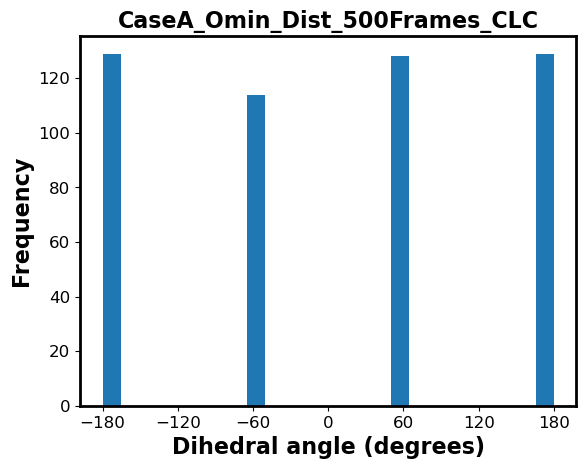

In [111]:
## Plot the selected samples to confirm histogram distribution 

## Create new histogram with the selected samples 
plt.hist(np.rad2deg(selected_diheds), bins=plotting_bins,density=False)  # You can adjust the number of bins as desired (50 or 25 for half distributions)

# Adding labels and title to the plot
plt.title(dist_name,fontsize=16, fontweight='bold')
plt.xlabel('Dihedral angle (degrees)',fontsize=16, fontweight='bold')
plt.ylabel('Frequency',fontsize=16, fontweight='bold')
#plt.xlim(-np.pi, np.pi)
#plt.ylim(0,65)
# Displaying the plot

# Increase size of tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(np.arange(-180, 180+60, step=60))

# Darken the borders of the plot
ax = plt.gca()
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)

plt.show()

At this stage, the dihedral values and index of the selected configurations are stored in arrays (selected_diheds, and selected_indexes). Now we are going to use the indices to select the potential energy and atomic forces from the LAMMPS outputs. For tutorial purposes we are going to use the Boltzmann distribution but uncommenting the function of interest will result i nthe generation of the training data distribution of interest. 



In [112]:
## Load lammps otuputfile to extract time and potential energy using index of selected frames
lmp_log_file = '../prep_train_data/./butane_nvt_prod.log'
lmp_log = lmplog.File(lmp_log_file )

# Get the step,time and potential energy from the log file
#step = lmp_log.get('Step')
lmp_log_time = lmp_log.get('Time')
epot = lmp_log.get('PotEng')

In [113]:
## Grap the potential energy using the indexes
log_potEng = epot[selected_indices] # kcal/mol
log_time_samples =lmp_log_time[selected_indices] # fs

# Define numebr of samples
num_samples = len(log_potEng)

try:
    print('Potential energies extracted sucessfully from lammps output using the indexes of selected configurations.')

except:
    print('There was an error extracting the potential energy from the LAMMPS output file')

Potential energies extracted sucessfully from lammps output using the indexes of selected configurations.


In [114]:
## Load functiont to read the LAMMPS dump output and extract atomic corrdinates from xyz trajectory file and atomic forces from LAMMPS dump file
from prep_clc_npz_scripts import read_xyz_traj, xyz_cords_array,parse_lammpstrj,forces_array

# Read xyz trajectory file
xyz_traj_file = '../prep_train_data/but_test.xyz'
#Read xyz trajectory file
xyz_dict = read_xyz_traj(xyz_traj_file)


## Get the number of atoms
num_atoms = len(xyz_dict['frames'][0]['atoms_data'])

# Create a new empty array with the desired shape
coordinates = np.empty((num_samples, num_atoms, 3))
LOUD = False

for i,index in enumerate(selected_indices):
    
    print(f'\nIndex: {index}')
    #Extract time from frmae from xyz dictionary
    xyz_time = xyz_dict['frames'][index]['timestep']
    log_time = log_time_samples[i]
    colvar_time = round(time_from_index[i]*1000)
    
    if LOUD:
        print(f'\nxyz_time: {xyz_time} (fs)')
        print(f'logfile Time: {log_time_samples[i]} (fs)')  
        print(f'Colvar Time: {round(time_from_index[i]*1000)} (fs)\n') 
        
    if xyz_time == log_time == colvar_time:
        if LOUD:
            print(f'Time Matched: {xyz_time} (fs)\n')
        
        # Extract xyz coordinates from the dictionary and store them in an array
        coordinates[i,:,:] = xyz_cords_array(xyz_dict,index)

try:
    print('\n\nAtomic coordinates extracted succesfuly from LAMMPS xyz trajectory file.')
except:
    print('There was an error extracting the atomic coordinates from the xyz trajectory file.')
    print(f'File loaction: {xyz_traj_file}')


Index: 279

Index: 346

Index: 409

Index: 688

Index: 885

Index: 1121

Index: 1205

Index: 1421

Index: 1605

Index: 1907

Index: 1936

Index: 2068

Index: 2108

Index: 2121

Index: 2313

Index: 2456

Index: 2911

Index: 3081

Index: 3360

Index: 4480

Index: 4496

Index: 4528

Index: 4545

Index: 4590

Index: 4681

Index: 4841

Index: 5135

Index: 5505

Index: 5656

Index: 5793

Index: 5868

Index: 5897

Index: 6546

Index: 6571

Index: 7021

Index: 7369

Index: 7548

Index: 7733

Index: 8155

Index: 8260

Index: 8359

Index: 8490

Index: 8834

Index: 8896

Index: 8960

Index: 9151

Index: 9163

Index: 9246

Index: 9377

Index: 9414

Index: 9644

Index: 9800

Index: 9883

Index: 10819

Index: 10891

Index: 11026

Index: 11344

Index: 11842

Index: 12446

Index: 12536

Index: 12563

Index: 12808

Index: 13000

Index: 13043

Index: 13059

Index: 13078

Index: 13160

Index: 13174

Index: 13175

Index: 13240

Index: 13605

Index: 13698

Index: 13925

Index: 13933

Index: 14301

Index: 

In [115]:
## Load LAMMPS dump file containing the atomic forces for each frame. kcal/mol/A
## Parser forces files and create dictionary 
forces_file = '../prep_train_data/./forces.dump'
forces_dict = parse_lammpstrj(forces_file)

# Create a new empty array with the desired shape
forces = np.empty((num_samples, num_atoms, 3))
LOUD = True #False

for i,index in enumerate(selected_indices):
    
    # if i > 5:
    #     break
    
    print(f'\nIndex: {index}')
    #Extract time from frmae from xyz dictionary
    xyz_time = xyz_dict['frames'][index]['timestep']
    log_time = log_time_samples[i]
    colvar_time = round(time_from_index[i]*1000)
    forces_time = forces_dict[xyz_time]['timestep']
    
    # if LOUD:
    #     print(f'\nxyz_time: {xyz_time} (fs)')
    #     print(f'logfile Time: {log_time_samples[i]} (fs)')  
    #     print(f'Colvar Time: {round(time_from_index[i]*1000)} (fs)\n') 
        
    if xyz_time == log_time == colvar_time == forces_time:
        if LOUD:
            print(f'Time Matched: {xyz_time} (fs)\n')
        
        # Extract xyz coordinates from the dictionary and store them in an array
        forces[i] = forces_array(forces_dict,xyz_time)
        


Index: 279
Time Matched: 5580 (fs)


Index: 346
Time Matched: 6920 (fs)


Index: 409
Time Matched: 8180 (fs)


Index: 688
Time Matched: 13760 (fs)


Index: 885
Time Matched: 17700 (fs)


Index: 1121
Time Matched: 22420 (fs)


Index: 1205
Time Matched: 24100 (fs)


Index: 1421
Time Matched: 28420 (fs)


Index: 1605
Time Matched: 32100 (fs)


Index: 1907
Time Matched: 38140 (fs)


Index: 1936
Time Matched: 38720 (fs)


Index: 2068
Time Matched: 41360 (fs)


Index: 2108
Time Matched: 42160 (fs)


Index: 2121
Time Matched: 42420 (fs)


Index: 2313
Time Matched: 46260 (fs)


Index: 2456
Time Matched: 49120 (fs)


Index: 2911
Time Matched: 58220 (fs)


Index: 3081
Time Matched: 61620 (fs)


Index: 3360
Time Matched: 67200 (fs)


Index: 4480
Time Matched: 89600 (fs)


Index: 4496
Time Matched: 89920 (fs)


Index: 4528
Time Matched: 90560 (fs)


Index: 4545
Time Matched: 90900 (fs)


Index: 4590
Time Matched: 91800 (fs)


Index: 4681
Time Matched: 93620 (fs)


Index: 4841
Time Matched: 96820 

In [116]:
## Since all models are for the same butane molecule and the simulation parameters were modified to print the data of all frames using the same orger of atoms. Therofre, the order of atoms for each frame is the same and can be predefined as bellow:
type_array = np.array([6,1,1,1,6,1,1,6,1,1,6,1,1,1])


In [117]:
# PRINT THE SHAPES OF THE COORDINATES, FORCES, ENERGY AND TYPE ARRAYS

print('Training data: \n')

print(f'coordinates.shape = {coordinates.shape}')
print(f'forces.shape = {forces.shape}')
print(f'energy.shape = {log_potEng.shape}')
print(f'type_array.shape = {type_array.shape}')

Training data: 

coordinates.shape = (500, 14, 3)
forces.shape = (500, 14, 3)
energy.shape = (500,)
type_array.shape = (14,)


In [118]:
## Save the generated Distribution. The name will be asign depending on the used function

np.savez(dist_name+'.npz', R=coordinates, F=forces, E=log_potEng, z=type_array,diheds=selected_diheds)
